In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import torch

In [3]:
df = pd.read_csv("reward_distributions.csv")
df

,value
0,-2.344288
1,0.297578
2,0.145182
3,-0.262115
4,-1.045688
...,...
5098,-1.215017
5099,-1.549995
5100,-1.793821
5101,-0.345185


In [4]:
statistics = df["value"].describe()
statistics

count    5103.000000
mean       -1.235923
std         0.696249
min        -3.992507
25%        -1.695657
50%        -1.206938
75%        -0.748854
max         1.237453
Name: value, dtype: float64

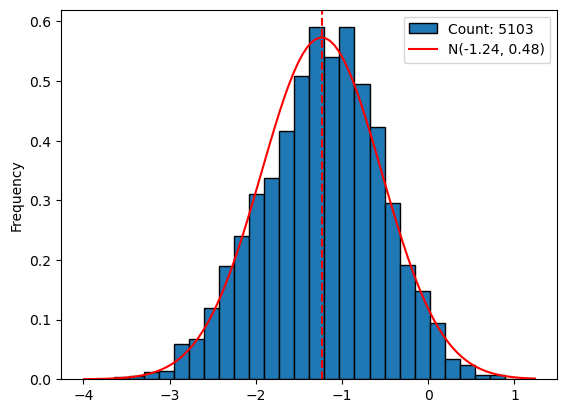

In [8]:
ax = df.plot.hist(
    density=True, bins=30,
    edgecolor="black", legend=False,
)

# Plot the normal distribution
x = np.linspace(statistics["min"], statistics["max"], 100)
mean = statistics["mean"]
std = statistics["std"]
y = np.exp(-(x - mean)**2 / (2 * std**2)) / (std * np.sqrt(2 * np.pi))
ax.plot(x, y, color="red")
ax.axvline(mean, color="red", linestyle="--")
ax.legend([f"Count: {len(df)}", f"N({mean:2.2f}, {std**2:2.2f})"])

## Normal CDF inverse

In [42]:
# Source
# @https://stats.stackexchange.com/questions/187828/how-are-the-error-function-and-standard-normal-distribution-function-related

def inverse_normal_cdf(p, mean, std):
    q = 2 * p - 1  # Convert the probability to the quantile
    x = std * np.sqrt(2) * torch.erfinv(q) + mean
    
    return x

In [71]:
mu = 0.5
std = 1.2

p = torch.rand(100000, requires_grad=True)
x = inverse_normal_cdf(p, mu, std)
x.mean(), x.std()

(tensor(0.5001, grad_fn=<MeanBackward0>),
 tensor(1.1995, grad_fn=<StdBackward0>))

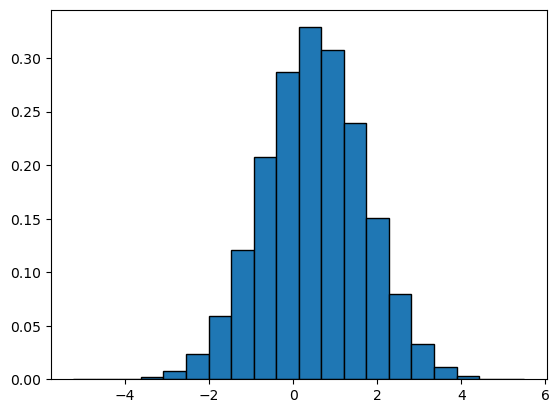

In [72]:
plt.hist(x.detach(), bins=20, density=True, edgecolor="black");

In [73]:
p.grad

In [74]:
x.mean().backward()
p.grad

tensor([3.3368e-05, 8.0508e-05, 4.8237e-05,  ..., 4.0260e-04, 4.6623e-05,
        1.0351e-04])

In [75]:
p.grad.shape

torch.Size([100000])

In [69]:
p.grad=None
p.grad